In [1]:
# importing libraries
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder

### Load datasets

We will use the probability of being alive, calculate by the model BG-NBD as your criteria to define our target variable: customer churn.

In [2]:
# load dataset with casino_classic only gamblers grouped by player_id and gender
casino_class_grp = pd.read_csv("../data/df_from_casino_class_grp.csv")

#load dataset from the model bg-nbd
bgf = pd.read_csv("../data/df_from_gb-nbd.csv")

In [3]:
# dimensions
bgf.shape, casino_class_grp.shape

((6808, 6), (6808, 11))

We can see that the dataframes `casino_class_grp` and `bgf` have the same number of rows, so we can concatenate them.

In [4]:
horizontal_stack = pd.concat([casino_class_grp, bgf], axis=1)
horizontal_stack.head()

,player_id_cat,deposit_approved_sum,withdrawal_approved_sum,turnover_cash_sum,winning_cash_sum,result_cash_sum,NGR_sum,bonus_cash_sum,session_sum,female,male,frequency,recency,T,monetary_value,prob_alive,purchase_next_4_weeks
0,1,87,146,309,337,28,-29,106,81819,1.0,0.0,23.0,46.0,48.0,3456.782609,0.953786,1.773636
1,2,1915,109,5003,3197,-1806,1785,98,28623,0.0,1.0,17.0,45.0,46.0,1126.647059,0.966161,1.392427
2,4,91,0,280,189,-91,90,0,5468,0.0,1.0,0.0,0.0,39.0,0.000000,1.000000,0.041796
3,8,59,0,103,45,-58,59,41,2122,1.0,0.0,0.0,0.0,14.0,0.000000,1.000000,0.107560
4,9,1885,1345,8751,8036,-715,513,69,23072,0.0,1.0,2.0,8.0,18.0,9546.500000,0.620136,0.299726


### Target variable definition

In [5]:
# turning probabilities into binary values and adding them as a new column
horizontal_stack["no_churn"] = horizontal_stack.prob_alive.map(lambda x: int(x > 0.5))


# removing column prob_alive
horizontal_stack = horizontal_stack.drop(["prob_alive"], axis=1)

In [6]:
horizontal_stack.head()

,player_id_cat,deposit_approved_sum,withdrawal_approved_sum,turnover_cash_sum,winning_cash_sum,result_cash_sum,NGR_sum,bonus_cash_sum,session_sum,female,male,frequency,recency,T,monetary_value,purchase_next_4_weeks,no_churn
0,1,87,146,309,337,28,-29,106,81819,1.0,0.0,23.0,46.0,48.0,3456.782609,1.773636,1
1,2,1915,109,5003,3197,-1806,1785,98,28623,0.0,1.0,17.0,45.0,46.0,1126.647059,1.392427,1
2,4,91,0,280,189,-91,90,0,5468,0.0,1.0,0.0,0.0,39.0,0.000000,0.041796,1
3,8,59,0,103,45,-58,59,41,2122,1.0,0.0,0.0,0.0,14.0,0.000000,0.107560,1
4,9,1885,1345,8751,8036,-715,513,69,23072,0.0,1.0,2.0,8.0,18.0,9546.500000,0.299726,1


In [7]:
# counting the numbers of the binary class
horizontal_stack.no_churn.value_counts(normalize=True)

1    0.797297
0    0.202703
Name: no_churn, dtype: float64

#### Target variable

Since the target variable was defined using the probabilities of a consumer being alive, it was defined as `no_churn`.

We have:
* around 80% of users in the positive class (_will not churn_) 
* around 20% of users in the negative class (_will churn_)

We have an imbalanced dataset!

In [8]:
#dimensions
horizontal_stack.shape

(6808, 17)

In [9]:
# save dataframe to file
horizontal_stack.to_csv("../data/train.csv", index=False)

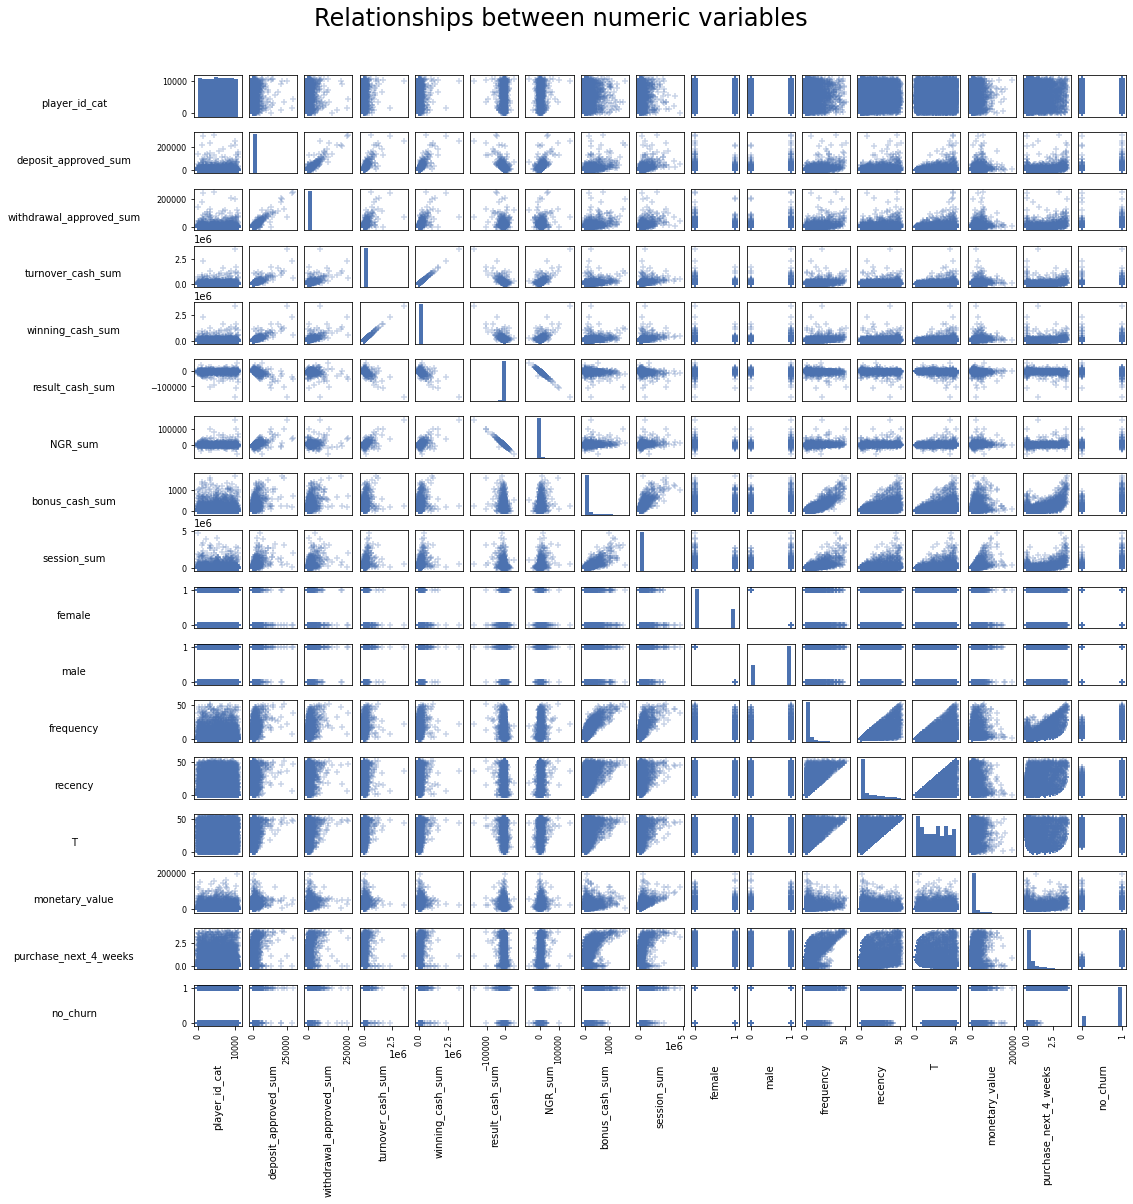

In [10]:
# visualize the dataset
plt.style.use("seaborn-deep")
sm = scatter_matrix(
    horizontal_stack,
    alpha=0.3,
    diagonal="hist",
    range_padding=0.2,
    marker="+",
    figsize=(16, 16),
)

# change label rotation
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# offset label when rotating to prevent overlap of figure
[s.get_xaxis().set_label_coords(0.5, -0.9) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-2.5, 0.2) for s in sm.reshape(-1)]

plt.tight_layout(h_pad=0.08, w_pad=0.08)
plt.suptitle("Relationships between numeric variables", y=1.05, size=24)
plt.show()
plt.close()

In [11]:
horizontal_stack.columns

Index(['player_id_cat', 'deposit_approved_sum', 'withdrawal_approved_sum',
       'turnover_cash_sum', 'winning_cash_sum', 'result_cash_sum', 'NGR_sum',
       'bonus_cash_sum', 'session_sum', 'female', 'male', 'frequency',
       'recency', 'T', 'monetary_value', 'purchase_next_4_weeks', 'no_churn'],
      dtype='object')

#### Create another training dataset with a reduced number of features

In [12]:
# removing column prob_alive
horizontal_stack_reduced = horizontal_stack.drop(["frequency", "recency", "T", "monetary_value", "purchase_next_4_weeks"], axis=1)

In [13]:
horizontal_stack_reduced.head()

,player_id_cat,deposit_approved_sum,withdrawal_approved_sum,turnover_cash_sum,winning_cash_sum,result_cash_sum,NGR_sum,bonus_cash_sum,session_sum,female,male,no_churn
0,1,87,146,309,337,28,-29,106,81819,1.0,0.0,1
1,2,1915,109,5003,3197,-1806,1785,98,28623,0.0,1.0,1
2,4,91,0,280,189,-91,90,0,5468,0.0,1.0,1
3,8,59,0,103,45,-58,59,41,2122,1.0,0.0,1
4,9,1885,1345,8751,8036,-715,513,69,23072,0.0,1.0,1


In [14]:
# save dataframe to file
horizontal_stack_reduced.to_csv("../data/train_reduced.csv", index=False)